In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv("/Users/udit/git projects/ML---Implimentations/Random Forest/Dataset/Travel.csv")

In [69]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [70]:
df.shape

(4888, 20)

In [71]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [73]:
# check all the categorical features 
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [74]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [75]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [76]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [77]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [78]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [79]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [80]:
# columns with the missing values 
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_with_na: 
    print(feature, np.round(df[feature].isnull().mean()*100,2), '% missing values')

Age 4.62 % missing values
TypeofContact 0.51 % missing values
DurationOfPitch 5.14 % missing values
NumberOfFollowups 0.92 % missing values
PreferredPropertyStar 0.53 % missing values
NumberOfTrips 2.86 % missing values
NumberOfChildrenVisiting 1.35 % missing values
MonthlyIncome 4.77 % missing values


In [81]:
# Statistics on numerical columns (Null Cols) 
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Filling missing values

In [82]:
# Imputing NaN Values 
df.Age.fillna(df.Age.median(), inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True) 
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True) 
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.median, inplace=True)

### Drop Features

In [83]:
df.drop('CustomerID', axis=1, inplace=True)

## Feature Engineering 
### Feature Extraction

In [84]:
# create a new column for feature 
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'], axis=1, inplace=True)

In [85]:
# Get all the numeric features 
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print("no of numerical Features : ", len(num_features))

no of numerical Features :  12


In [86]:
# Categorical Features 
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print("no of categorical features : ", len(cat_features))

no of categorical features :  6


In [87]:
# Discreate Features 
discreate_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
print("no of discreate features", len(discreate_features))

no of discreate features 9


In [88]:
# Continuous Featureas 
continuous_features = [feature for feature in num_features if feature not in discreate_features]
print("no of continuous features : ", len(continuous_features))

no of continuous features :  3


In [89]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Model Training 

In [90]:
from sklearn.model_selection import train_test_split 
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [91]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [92]:
# create column tronsformer with 3 types of transformers
c_features = X.select_dtypes(include='object').columns
n_features = X.select_dtypes(exclude='object').columns


for col in c_features: 
    X[col] = X[col].astype(str).str.strip().str.lower()

In [93]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer([ 
    ('OnehotEncoder', oh_transformer, c_features),
    ('StandardScaler', numeric_transformer, n_features)
])

In [96]:
# Seprate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [105]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [106]:
models = { 
    "Random Forest" : RandomForestClassifier(),
    "Decision" : DecisionTreeClassifier()
}

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("---------------------------------------------")

    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print("="*50)
    print("\n")


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
---------------------------------------------
Model performance for Test set
- Accuracy: 0.9255
- F1 Score: 0.9191
- Precision: 0.9521
- Recall: 0.6233
- ROC AUC Score: 0.8082


Decision
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
---------------------------------------------
Model performance for Test set
- Accuracy: 0.9034
- F1 Score: 0.9039
- Precision: 0.7293
- Recall: 0.7489
- ROC AUC Score: 0.8434




### Hyperparameter Training 

In [107]:
rf_params = {"max_depth" : [5,8,15,None, 10],
             "max_features" : [5,7,"auto",8], 
             "min_samples_split" : [2,8,15,18], 
             "n_estimators" : [100,200,500,1000]}

In [108]:
# Models list of Hyperparameter Tuning 
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [109]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models: 
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_ 

for model_name in model_param: 
    print(f"----------------------------------Best Params for {model_name}--------------------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=15, max_features=7, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=7, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=18, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=8, min_samples_split=18, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, max_features=7, min_samples_split=18, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=8, min_samples_split=18, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_s

In [115]:
models = { 
    "Random Forest" : RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, max_features = 7, max_depth = 15)
}

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("---------------------------------------------")

    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print("="*50)
    print("\n")


Random Forest
Model performance for Training set
- Accuracy: 0.9992
- F1 Score: 0.9992
- Precision: 1.0000
- Recall: 0.9957
- ROC AUC Score: 0.9978
---------------------------------------------
Model performance for Test set
- Accuracy: 0.9337
- F1 Score: 0.9289
- Precision: 0.9551
- Recall: 0.6682
- ROC AUC Score: 0.8306




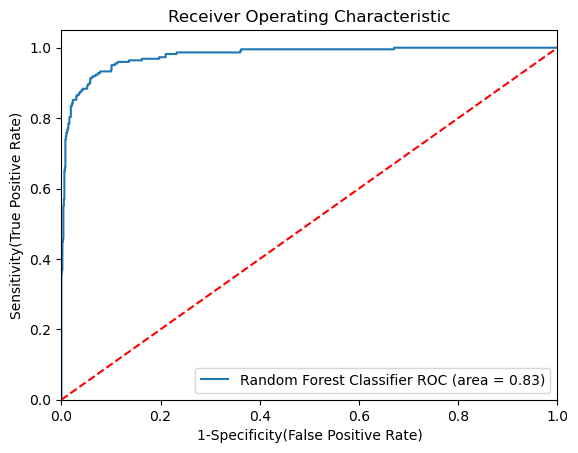

In [118]:
# Plot ROC AUC Curve 
from sklearn.metrics import roc_auc_score,roc_curve 
plt.figure()

auc_models = [ 
    { 
        "label" : 'Random Forest Classifier', 
        "model" : RandomForestClassifier(n_estimators=200, min_samples_split=2, 
                                         max_features=7, max_depth=15), 

        "auc" : 0.8306                            
    }
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 